In [1]:
import torch
from torch import nn
from torch import optim

In [2]:
# X, y
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float)
X, y

(tensor([[0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 1.]]),
 tensor([[0.],
         [1.],
         [1.],
         [0.]]))

In [3]:
# XOR net
class XOR(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,2),
            nn.Sigmoid(),
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [4]:
model = XOR()
model

XOR(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=2, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

In [41]:
def train(x, y, epochs=100, lr=1, loss='BCELoss', optimizer='SGD', model=None, every_print=100, reset=True):
    if not model:
        return

    if reset:
        for layer in model.model:
            if hasattr(layer, 'reset_parameters'):
                if reset == 'xavier':
                    nn.init.uniform_(layer.weight)
                    nn.init.uniform_(layer.bias)
                else:
                    layer.reset_parameters()

    optimizer = getattr(optim, optimizer)(model.parameters(), lr=lr)
    loss_fn = getattr(nn, loss)()

    for epoch in range(1, epochs+1):
        # grad 초기화
        optimizer.zero_grad()

        # forward
        hypothesis = model(x)

        # check loss 
        error = loss_fn(hypothesis, y)

        # backward - backpropagation
        error.backward()

        # update parameters
        optimizer.step()
        
        if epoch % every_print == 0:
            print(f'Epoch: {epoch}, loss: {error.item()}')

In [42]:
# optimizer: SGD, learning rate
train(X, y, epochs=20000, lr=0.01, model=model, every_print=1000)
model(X), torch.where(model(X)>0.5, 1, 0)

Epoch: 1000, loss: 0.6948477625846863
Epoch: 2000, loss: 0.6945362687110901
Epoch: 3000, loss: 0.694297730922699
Epoch: 4000, loss: 0.6941081881523132
Epoch: 5000, loss: 0.6939547657966614
Epoch: 6000, loss: 0.6938285827636719
Epoch: 7000, loss: 0.6937232613563538
Epoch: 8000, loss: 0.6936339735984802
Epoch: 9000, loss: 0.69355708360672
Epoch: 10000, loss: 0.6934901475906372
Epoch: 11000, loss: 0.6934309005737305
Epoch: 12000, loss: 0.693377673625946
Epoch: 13000, loss: 0.6933290958404541
Epoch: 14000, loss: 0.6932842135429382
Epoch: 15000, loss: 0.6932420134544373
Epoch: 16000, loss: 0.6932016611099243
Epoch: 17000, loss: 0.6931626796722412
Epoch: 18000, loss: 0.6931242346763611
Epoch: 19000, loss: 0.6930858492851257
Epoch: 20000, loss: 0.6930468082427979


(tensor([[0.5042],
         [0.4842],
         [0.5166],
         [0.4958]], grad_fn=<SigmoidBackward0>),
 tensor([[1],
         [0],
         [1],
         [0]]))

In [43]:
# Training Tips
# parameter initialization - nn.init
train(X, y, epochs=10000, lr=0.1, model=model, every_print=1000, reset='xavier')
model(X), torch.where(model(X)>0.5, 1, 0)

Epoch: 1000, loss: 0.6910334825515747
Epoch: 2000, loss: 0.6755258440971375
Epoch: 3000, loss: 0.5877742767333984
Epoch: 4000, loss: 0.4738437831401825
Epoch: 5000, loss: 0.23519787192344666
Epoch: 6000, loss: 0.08789493143558502
Epoch: 7000, loss: 0.04928769916296005
Epoch: 8000, loss: 0.0335942879319191
Epoch: 9000, loss: 0.025298353284597397
Epoch: 10000, loss: 0.02021601051092148


(tensor([[0.0228],
         [0.9816],
         [0.9818],
         [0.0206]], grad_fn=<SigmoidBackward0>),
 tensor([[0],
         [1],
         [1],
         [0]]))

In [44]:
# optimizer: Adam
train(X, y, epochs=10000, lr=0.01, optimizer='Adam', model=model, every_print=1000)
model(X), torch.where(model(X)>0.5, 1, 0)

Epoch: 1000, loss: 0.0363386906683445
Epoch: 2000, loss: 0.009789608418941498
Epoch: 3000, loss: 0.004256583750247955
Epoch: 4000, loss: 0.0021808042656630278
Epoch: 5000, loss: 0.001206467510201037
Epoch: 6000, loss: 0.0006951229879632592
Epoch: 7000, loss: 0.0004097117343917489
Epoch: 8000, loss: 0.0002447175793349743
Epoch: 9000, loss: 0.00014733787975274026
Epoch: 10000, loss: 8.909496682463214e-05


(tensor([[8.3013e-05],
         [9.9990e-01],
         [9.9991e-01],
         [8.1341e-05]], grad_fn=<SigmoidBackward0>),
 tensor([[0],
         [1],
         [1],
         [0]]))

In [62]:
# both
train(X, y, epochs=10000, lr=0.01, optimizer='Adam', model=model, every_print=1000, reset='xavier')
model(X), torch.where(model(X)>0.5, 1, 0)

Epoch: 1000, loss: 0.5435960292816162
Epoch: 2000, loss: 0.028645722195506096
Epoch: 3000, loss: 0.009511854499578476
Epoch: 4000, loss: 0.004464997909963131
Epoch: 5000, loss: 0.00237463996745646
Epoch: 6000, loss: 0.0013403233606368303
Epoch: 7000, loss: 0.0007809537928551435
Epoch: 8000, loss: 0.000463285919977352
Epoch: 9000, loss: 0.00027770810993388295
Epoch: 10000, loss: 0.00016753643285483122


(tensor([[1.3575e-04],
         [9.9985e-01],
         [9.9985e-01],
         [2.4339e-04]], grad_fn=<SigmoidBackward0>),
 tensor([[0],
         [1],
         [1],
         [0]]))

In [64]:
for x in model.named_parameters():
    print(x)

('model.0.weight', Parameter containing:
tensor([[ -9.9349,  -9.9595],
        [-11.8454, -11.8774]], requires_grad=True))
('model.0.bias', Parameter containing:
tensor([14.7225,  5.4317], requires_grad=True))
('model.2.weight', Parameter containing:
tensor([[ 17.4306, -17.9945]], requires_grad=True))
('model.2.bias', Parameter containing:
tensor([-8.4189], requires_grad=True))


In [66]:
from sympy import symbols, exp
from sympy.plotting import plot3d

x, x1, x2 = symbols('x, x1, x2')
w1, w2, w3, w4, w5, w6 = symbols('w1, w2, w3, w4, w5, w6')
b1, b2, b3 = symbols('b1, b2, b3')

In [67]:
sigmoid = 1 / (1+exp(-x))
sigmoid

1/(1 + exp(-x))

In [68]:
h1 = sigmoid.subs({'x':w1*x1 + w2*x2 + b1})
h1

1/(exp(-b1 - w1*x1 - w2*x2) + 1)

In [69]:
h2 = sigmoid.subs({'x':w3*x1 + w4*x2 + b2})
h2

1/(exp(-b2 - w3*x1 - w4*x2) + 1)

In [70]:
h1.subs({'w1': -9.9349, 'w2': -9.9595, 'b1': 14.7225})

1/(4.03737872504995e-7*exp(9.9349*x1 + 9.9595*x2) + 1)

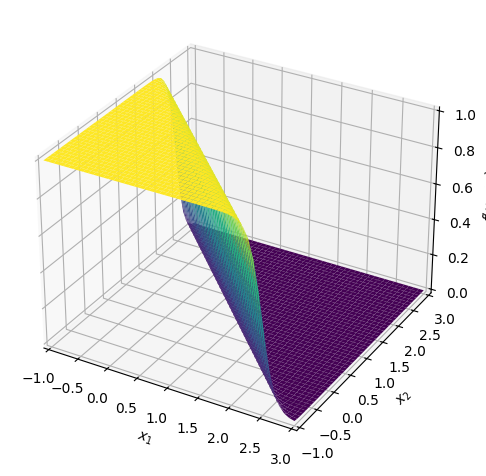

In [71]:
plot3d(h1.subs({'w1': -9.9349, 'w2': -9.9595, 'b1': 14.7225}) , (x1, -1, 3), (x2, -1, 3))

In [72]:
h2.subs({'w3': -11.8454, 'w4': -11.8774, 'b2': 5.4317})

1/(0.00437565086979017*exp(11.8454*x1 + 11.8774*x2) + 1)

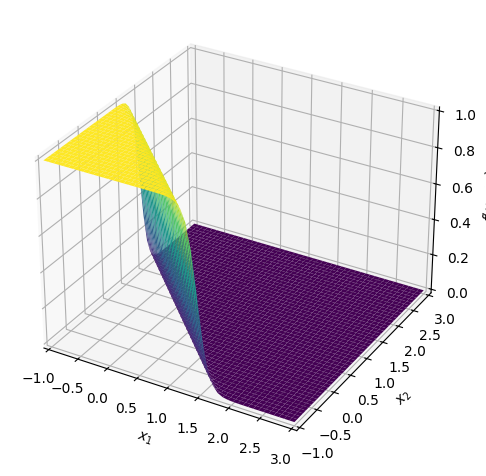

In [73]:
plot3d(h2.subs({'w3': -11.8454, 'w4': -11.8774, 'b2': 5.4317}), (x1, -1, 3), (x2, -1, 3))

In [98]:
sigmoid = nn.Sigmoid()

In [104]:
W = torch.tensor([[ -9.9349,  -9.9595],
        [-11.8454, -11.8774]])
b1 = torch.tensor([14.7225,  5.4317])
w = torch.tensor([[ 17.4306, -17.9945]])
b2 = torch.tensor([-8.4189])

In [105]:
hidden_layer = sigmoid(X @ W.T + b1)
hidden_layer

tensor([[1.0000e+00, 9.9564e-01],
        [9.9153e-01, 1.5848e-03],
        [9.9174e-01, 1.6363e-03],
        [5.6418e-03, 1.1383e-08]])

In [107]:
sigmoid(hidden_layer @ w.T + b2)

tensor([[1.3577e-04],
        [9.9985e-01],
        [9.9985e-01],
        [2.4340e-04]])